<a href="https://colab.research.google.com/github/decareano/python_repo/blob/master/japanVERvsPIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install chart_studio --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.7 MB/s eta 0:00:00


In [1]:
pip install fastf1 --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.8/121.8 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 11.7 MB/s eta 0:00:00


In [4]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils
import chart_studio.plotly as py
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
plt.style.use('dark_background')

import numpy as np
import pandas as pd

year, grand_prix, session = 2023, 'Japan', 'Q'

quali = ff1.get_session(year, grand_prix, session)
quali.load()

req         WARNING 	

DEFAULT CACHE ENABLED!
	Cache directory: /root/.cache/fastf1.
	Size: 24.0 KB

DEFAULT CACHE ENABLED!
	Cache directory: /root/.cache/fastf1.
	Size: 24.0 KB
core           INFO 	Loading data for Japanese Grand Prix - Qualifying [v3.1.3]
INFO:fastf1.fastf1.core:Loading data for Japanese Grand Prix - Qualifying [v3.1.3]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf

In [5]:
driver_1, driver_2 = 'VER', 'PIA'

laps_driver_1 = quali.laps.pick_driver(driver_1)
laps_driver_2 = quali.laps.pick_driver(driver_2)


fastest_driver_1 = laps_driver_1.pick_fastest()
fastest_driver_2 = laps_driver_2.pick_fastest()
display(fastest_driver_1)
display(fastest_driver_2)

Time                      0 days 01:27:51.032000
Driver                                       VER
DriverNumber                                   1
LapTime                   0 days 00:01:28.877000
LapNumber                                   11.0
Stint                                        4.0
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:30.725000
Sector2Time               0 days 00:00:40.311000
Sector3Time               0 days 00:00:17.841000
Sector1SessionTime        0 days 01:26:52.880000
Sector2SessionTime        0 days 01:27:33.191000
Sector3SessionTime        0 days 01:27:51.032000
SpeedI1                                    283.0
SpeedI2                                    305.0
SpeedFL                                    267.0
SpeedST                                    304.0
IsPersonalBest                              True
Compound                                    SOFT
TyreLife            

Time                      0 days 01:20:30.289000
Driver                                       PIA
DriverNumber                                  81
LapTime                   0 days 00:01:29.458000
LapNumber                                   10.0
Stint                                        4.0
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:31.173000
Sector2Time               0 days 00:00:40.356000
Sector3Time               0 days 00:00:17.929000
Sector1SessionTime        0 days 01:19:32.004000
Sector2SessionTime        0 days 01:20:12.360000
Sector3SessionTime        0 days 01:20:30.289000
SpeedI1                                    282.0
SpeedI2                                    307.0
SpeedFL                                    267.0
SpeedST                                    304.0
IsPersonalBest                              True
Compound                                    SOFT
TyreLife            

In [6]:
telemetry_driver_1 = fastest_driver_1.get_telemetry().add_distance()
telemetry_driver_2 = fastest_driver_2.get_telemetry().add_distance()

team_driver_1 = fastest_driver_1['Team']
team_driver_2 = fastest_driver_2['Team']

delta_time, ref_tel, compare_tel = utils.delta_time(fastest_driver_1, fastest_driver_2)

/usr/local/lib/python3.10/dist-packages/fastf1/utils.py:86: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"


<Figure size 640x480 with 0 Axes>

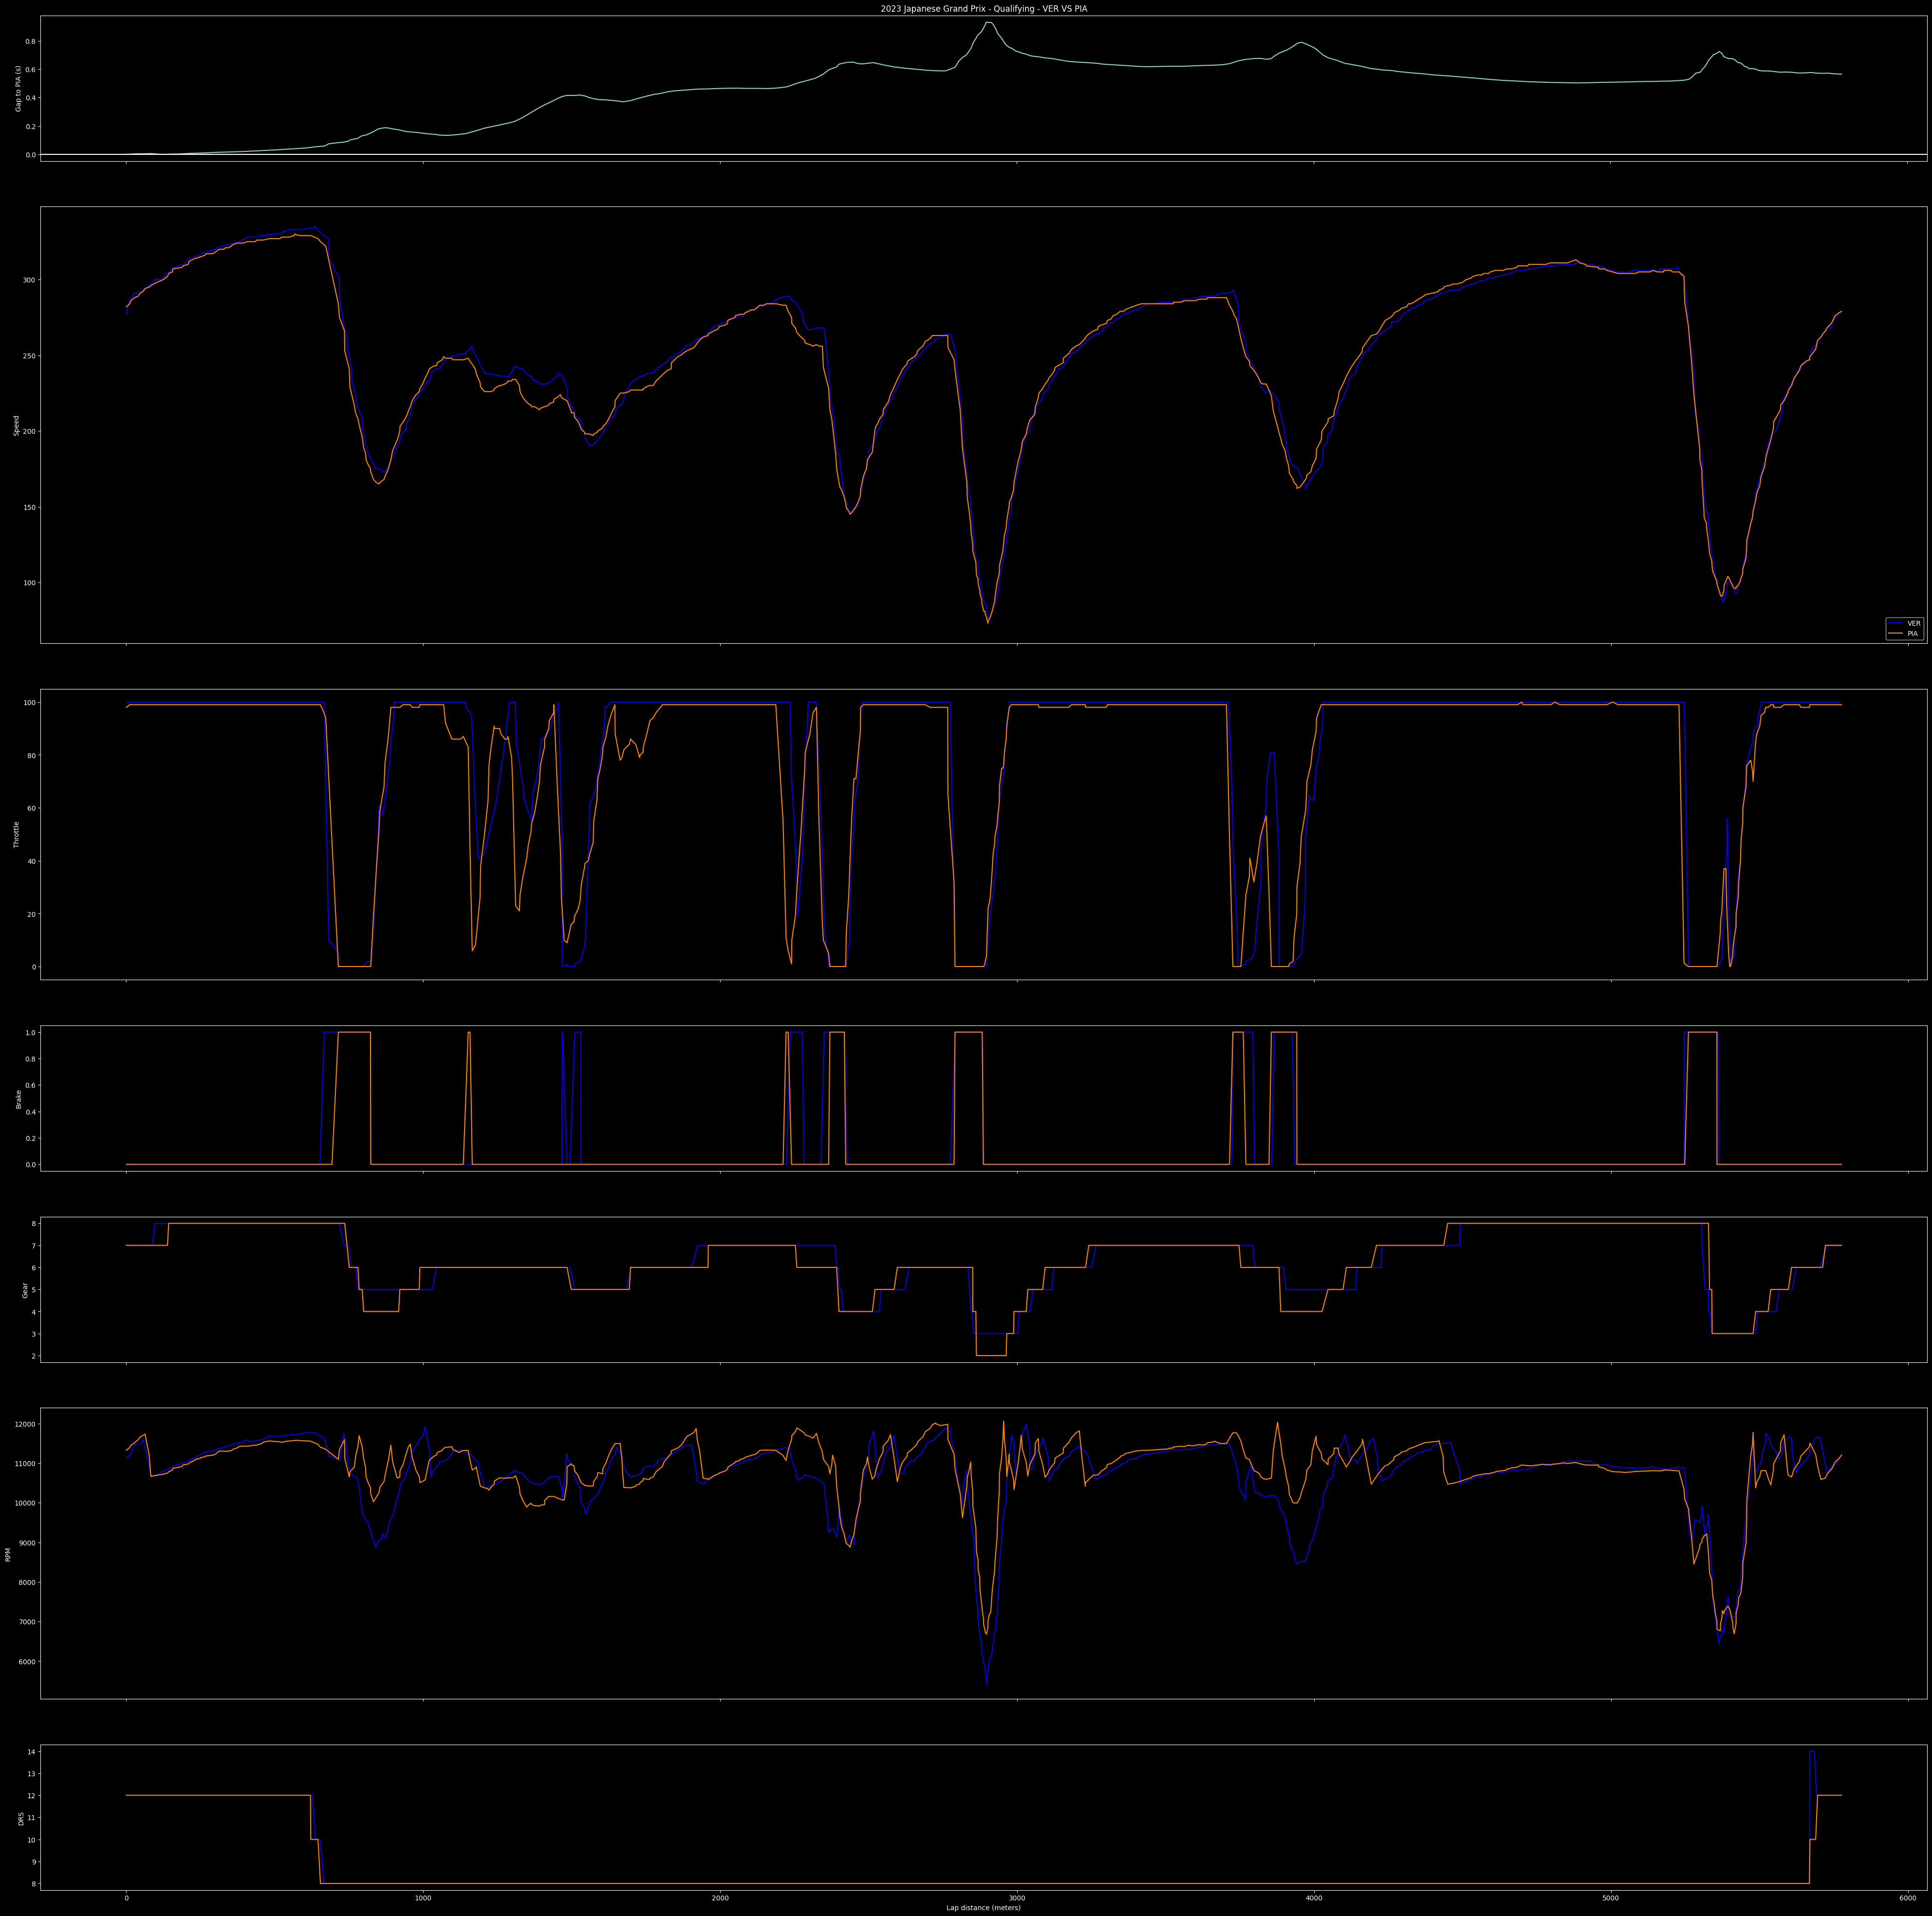

ValueError: ignored

In [7]:
plot_size = [50, 50]
mpl_fig = plt.figure()
plot_title = f"{quali.event.year} {quali.event.EventName} - {quali.name} - {driver_1} VS {driver_2}"
plot_ratios = [1, 3, 2, 1, 1, 2, 1]
plot_filename = plot_title.replace(" ", "") + ".png"

# Make plot a bit bigger
plt.rcParams['figure.figsize'] = plot_size

# Create subplots with different sizes
fig, ax = plt.subplots(7, gridspec_kw={'height_ratios': plot_ratios})

# Set the plot title
ax[0].title.set_text(plot_title)


# Delta line
ax[0].plot(ref_tel['Distance'], delta_time)
ax[0].axhline(0)
ax[0].set(ylabel=f"Gap to {driver_2} (s)")

# Speed trace
ax[1].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Speed'] ,label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[1].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Speed'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[1].set(ylabel='Speed')


ax[1].legend(loc="lower right")

# Throttle trace
ax[2].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Throttle'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[2].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Throttle'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[2].set(ylabel='Throttle')

# Brake trace
ax[3].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Brake'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[3].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Brake'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[3].set(ylabel='Brake')

# Gear trace
ax[4].plot(telemetry_driver_1['Distance'], telemetry_driver_1['nGear'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[4].plot(telemetry_driver_2['Distance'], telemetry_driver_2['nGear'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[4].set(ylabel='Gear')

# RPM trace
ax[5].plot(telemetry_driver_1['Distance'], telemetry_driver_1['RPM'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[5].plot(telemetry_driver_2['Distance'], telemetry_driver_2['RPM'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[5].set(ylabel='RPM')

# DRS trace
ax[6].plot(telemetry_driver_1['Distance'], telemetry_driver_1['DRS'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[6].plot(telemetry_driver_2['Distance'], telemetry_driver_2['DRS'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[6].set(ylabel='DRS')
ax[6].set(xlabel='Lap distance (meters)')


# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()

# Store figure
plt.savefig(plot_filename, dpi=400)
plt.show()

unique_url = py.plot_mpl(mpl_fig, filename="sin(x) test plot")